In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [2]:
Kidney = pd.read_csv("export_CKD.csv",delimiter=",")
#Split dataset
print(Kidney.head())
print("dimension of Hypertension data: {}".format(Kidney.shape))
X=Kidney.drop(["Unnamed: 0",'classification','id'],axis=1)
y= Kidney['classification']

   Unnamed: 0  id   age    bp     sg   al   su  rbc  pc  pcc  ...   pcv  \
0           0   0  48.0  80.0  1.020  1.0  0.0    0   0    1  ...  44.0   
1           1   1   7.0  50.0  1.020  4.0  0.0    0   0    1  ...  38.0   
2           2   2  62.0  80.0  1.010  2.0  3.0    0   0    1  ...  31.0   
3           3   3  48.0  70.0  1.005  4.0  0.0    0   1    0  ...  32.0   
4           4   4  51.0  80.0  1.010  2.0  0.0    0   0    1  ...  35.0   

       wc        rc  htn  dm  cad  appet  pe  ane  classification  
0  7800.0  5.200000    1   1    0      1   0    0               1  
1  6000.0  4.707435    0   0    0      1   0    0               1  
2  7500.0  4.707435    0   1    0      0   0    1               1  
3  6700.0  3.900000    1   0    0      0   1    1               1  
4  7300.0  4.600000    0   0    0      1   0    0               1  

[5 rows x 27 columns]
dimension of Hypertension data: (400, 27)


In [3]:
print(Kidney.groupby('classification').size())

classification
0    150
1    250
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


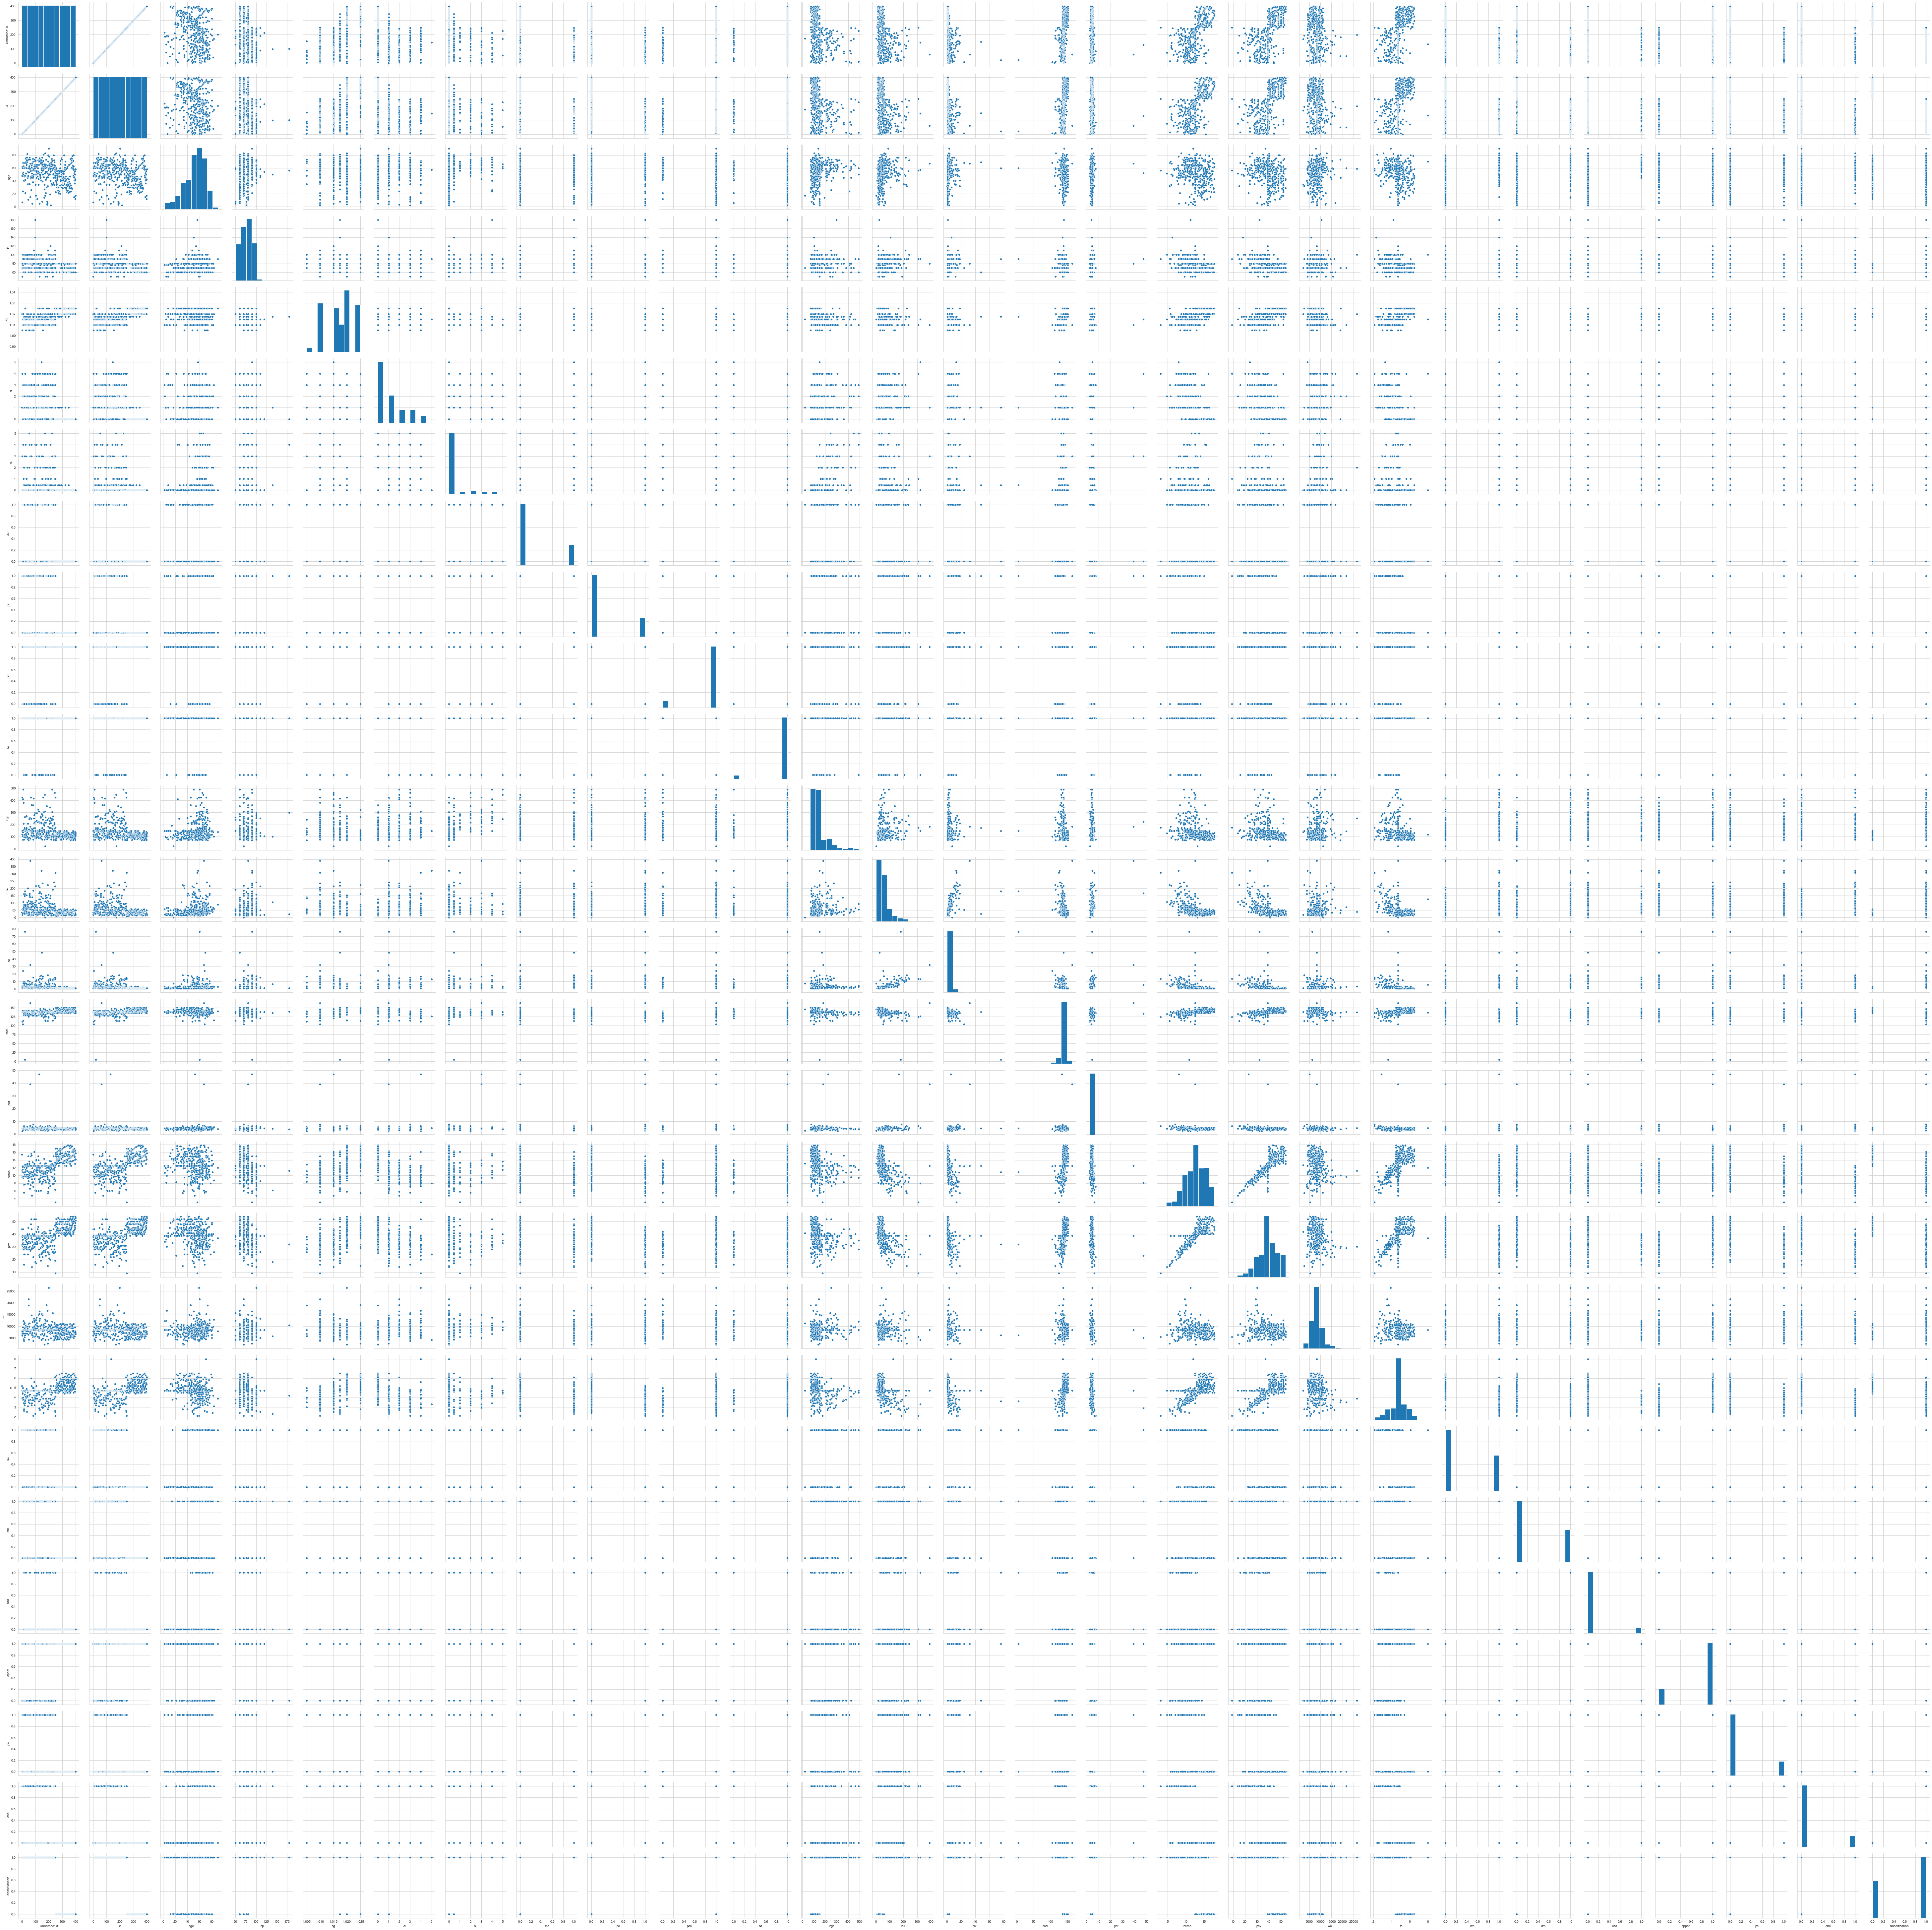

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(Kidney,size=3)

In [47]:
LR= LogisticRegression()
KNN= KNeighborsClassifier(n_neighbors=3)
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(15,15,15), activation='logistic', solver='lbfgs',random_state=42)
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [15]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=24),
    tf.keras.layers.Dense(3)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])

model.summary()

model.fit(X, y, epochs=150, batch_size=100)

_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 51        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Train on 400 samples
Epoch 1/150
400/400 [==============================] - 0s 226us/sample - loss: 471.2508 - accuracy: 0.6250
Epoch 2/150
400/400 [==============================] - 0s 28us/sample - loss: 380.2844 - accuracy: 0.6250
Epoch 3/150
400/400 [==============================] - 0s 34us/sample - loss: 286.1528 - accuracy: 0.6250
Epoch 4/150
400/400 [==============================] - 0s 32us/sample - loss: 202.1800 - accuracy: 0.6250
Epoch 5/150
400/400 [==============================] - 0s 52us/sample - 

400/400 [==============================] - 0s 35us/sample - loss: 0.9105 - accuracy: 0.8500
Epoch 147/150
400/400 [==============================] - 0s 29us/sample - loss: 1.1570 - accuracy: 0.8050
Epoch 148/150
400/400 [==============================] - 0s 28us/sample - loss: 1.1920 - accuracy: 0.8375
Epoch 149/150
400/400 [==============================] - 0s 29us/sample - loss: 1.3511 - accuracy: 0.8225
Epoch 150/150
400/400 [==============================] - 0s 110us/sample - loss: 1.0564 - accuracy: 0.8475
Accuracy: 84.75


In [16]:
# evaluate the model
_, train_acc = model.evaluate(X_train2,y_train2 , verbose=0)
print('train',train_acc)
_, test_acc = model.evaluate(X_test2, y_test2, verbose=0)
print('test',test_acc)

train 0.84864867
test 0.8333333


In [17]:
y_pred = model.predict(X_test2, batch_size=5)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test2, y_pred_bool))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.93      0.76      0.84        17

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30



In [39]:
print(Kidney.columns)

Index(['Unnamed: 0', 'id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc',
       'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'classification'],
      dtype='object')


# feature selection 

In [41]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
#bu,wc, pcv,bgr,sc
X_chi=Kidney.drop(['Unnamed: 0', 'id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc','ba','sod', 'pot', 'hemo', 'rc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'classification'],axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_chi,y,test_size=30,random_state=100)

In [56]:
sfs=SFS(RF,k_features =9,forward=True,floating=False,scoring='accuracy',verbose=2,cv =4,n_jobs= -1)
sfs.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   51.6s finished

[2020-02-26 14:42:21] Features: 1/9 -- score: 0.9126662666266627[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:   13.0s finished

[2020-02-26 14:42:35] Features: 2/9 -- score: 0.9725222522252225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:   12.7s finished

[2020-02-26 14:42:47] Features: 3/9 -- score: 0.984998499849985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   12.2s finished

[2020-02-26 14:43:00] Features: 4/9 -- score: 0.98994899489949[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.7s finished

[2020-0

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_es

In [57]:
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score: ',sfs.k_score_)

(2, 4, 5, 6, 14, 15, 18, 19, 21)
('sg', 'su', 'rbc', 'pc', 'hemo', 'pcv', 'htn', 'dm', 'appet')
CV Score:  0.9974747474747475


In [14]:
X_sfs=Kidney.drop(['classification','age', 'bp', 'al','pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'wc', 'rc','cad', 'pe', 'ane'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sfs,y,test_size=30,random_state=7)

In [15]:
rfe = RFE(RF,n_features_to_select = 9).fit(X, y)
print(rfe.get_support())
print(X.columns)

[False False  True  True False False False False False  True False  True
 False False  True  True False  True  True  True False False False False]
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [22]:
X_rfe=Kidney.drop(['classification','age', 'bp', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bu',
      'sod', 'pot', 'wc', 'cad', 'appet', 'pe', 'ane'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_rfe,y,test_size=30,random_state=7)

In [4]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=30,random_state=7)

In [43]:
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    fpr, tpr, thresholds = metrics.roc_curve(y_te, predict, pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print("Auc",auc)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))
    

In [44]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)


# LR

In [19]:
#before feature selection
model(LR,X_train2, X_test2, y_train2, y_test2)
crossV(LR,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  0.9864864864864865
test acc:  1.0
Cross Validation: 
Accuracy :  98.25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

f1 :  98.14288910224825
recall :  98.33333333333334
precision :  98.02435897435898


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# rfe 
model(LR,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  0.9891891891891892
test acc:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
#sfs
model(LR,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0333
Auc 0.9705882352941176
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Train acc:  0.9864864864864865
test acc:  0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
#chi
model(LR,X_train3, X_test3, y_train3, y_test3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MAE = 0.0667
Auc 0.9090909090909091
accuracy score 93.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30

Train acc:  0.9162162162162162
test acc:  0.9333333333333333


# SVM

In [26]:
#before feature selection
model(SVM,X_train2, X_test2, y_train2, y_test2)
crossV(SVM,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to

MAE = 0.4333
Auc 0.5
accuracy score 56.666666666666664
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30

Train acc:  1.0
test acc:  0.5666666666666667
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Accuracy :  62.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 

f1 :  38.46153846153847


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

recall :  50.0
precision :  31.25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 

In [28]:
# rfe 
model(SVM,X_train, X_test, y_train, y_test)

MAE = 0.4333
Auc 0.5
accuracy score 56.666666666666664
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30

Train acc:  1.0
test acc:  0.5666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
#sfs
model(SVM,X_train1, X_test1, y_train1, y_test1)

MAE = 0.1333
Auc 0.8461538461538461
accuracy score 86.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.81      1.00      0.89        17

    accuracy                           0.87        30
   macro avg       0.90      0.85      0.86        30
weighted avg       0.89      0.87      0.86        30

Train acc:  1.0
test acc:  0.8666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
#chi
model(SVM,X_train3, X_test3, y_train3, y_test3)

MAE = 0.3667
Auc 0.5
accuracy score 63.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.63      1.00      0.78        19

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30

Train acc:  1.0
test acc:  0.6333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# MLP

In [30]:
#before feature selection
model(MLP,X_train2, X_test2, y_train2, y_test2)
crossV(MLP,X,y)

MAE = 0.6000
Auc 0.36199095022624433
accuracy score 40.0
Classification report 

              precision    recall  f1-score   support

           0       0.14      0.08      0.10        13
           1       0.48      0.65      0.55        17

    accuracy                           0.40        30
   macro avg       0.31      0.36      0.33        30
weighted avg       0.33      0.40      0.36        30

Train acc:  0.4594594594594595
test acc:  0.4
Cross Validation: 
Accuracy :  43.49999999999999
f1 :  32.512447131995806
recall :  35.86666666666666
precision :  30.07976267663502


In [31]:
# rfe 
model(MLP,X_train, X_test, y_train, y_test)

MAE = 0.2000
Auc 0.7692307692307692
accuracy score 80.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.74      1.00      0.85        17

    accuracy                           0.80        30
   macro avg       0.87      0.77      0.78        30
weighted avg       0.85      0.80      0.79        30

Train acc:  0.8675675675675676
test acc:  0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
#sfs
model(MLP,X_train1, X_test1, y_train1, y_test1)

MAE = 0.1667
Auc 0.8529411764705883
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.71      0.83        17

    accuracy                           0.83        30
   macro avg       0.86      0.85      0.83        30
weighted avg       0.88      0.83      0.83        30

Train acc:  0.7648648648648648
test acc:  0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
#chi
model(MLP,X_train3, X_test3, y_train3, y_test3)

MAE = 0.3667
Auc 0.5
accuracy score 63.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.63      1.00      0.78        19

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30

Train acc:  0.6243243243243243
test acc:  0.6333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# naive bayes

In [33]:
#before feature selection
model(NB,X_train2, X_test2, y_train2, y_test2)
crossV(NB,X,y)

MAE = 0.0333
Auc 0.9705882352941176
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Train acc:  0.972972972972973
test acc:  0.9666666666666667
Cross Validation: 
Accuracy :  97.24999999999999
f1 :  97.17229986720255
recall :  97.8
precision :  97.01593137254902


In [34]:
# rfe 
model(NB,X_train, X_test, y_train, y_test)

MAE = 0.0667
Auc 0.9230769230769231
accuracy score 93.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.89      1.00      0.94        17

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

Train acc:  0.9783783783783784
test acc:  0.9333333333333333


In [35]:
#sfs
model(NB,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0333
Auc 0.9705882352941176
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Train acc:  0.9594594594594594
test acc:  0.9666666666666667


In [51]:
#chi
model(NB,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0333
Auc 0.9545454545454545
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

Train acc:  0.8540540540540541
test acc:  0.9666666666666667


# Knn

In [36]:
#before feature selection
model(KNN,X_train2, X_test2, y_train2, y_test2)
crossV(KNN,X,y)

MAE = 0.2000
Auc 0.8144796380090499
accuracy score 80.0
Classification report 

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.92      0.71      0.80        17

    accuracy                           0.80        30
   macro avg       0.81      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30

Train acc:  0.9054054054054054
test acc:  0.8
Cross Validation: 
Accuracy :  76.99999999999999
f1 :  76.34731703537409
recall :  78.0
precision :  77.01312469892024


In [37]:
# rfe 
model(KNN,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [38]:
#sfs
model(KNN,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [52]:
#chi
model(KNN,X_train3, X_test3, y_train3, y_test3)

MAE = 0.1667
Auc 0.8492822966507177
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.94      0.79      0.86        19

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.83        30
weighted avg       0.86      0.83      0.84        30

Train acc:  0.8891891891891892
test acc:  0.8333333333333334


# DecisionTree

In [39]:
#before feature selection
model(DT,X_train2, X_test2, y_train2, y_test2)
crossV(DT,X,y)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  97.5
f1 :  96.79819674254574
recall :  97.53333333333333
precision :  96.91021032344563


In [40]:
# rfe 
model(DT,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [41]:
#sfs
model(DT,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [53]:
#chi
model(DT,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# Random Forest

In [42]:
#before feature selection
model(RF,X_train2, X_test2, y_train2, y_test2)
crossV(RF,X,y)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  98.75
f1 :  98.65343416394538
recall :  98.6
precision :  98.81232193732194


In [43]:
# rfe 
model(RF,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [44]:
#sfs
model(RF,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [54]:
#chi
model(RF,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# CART

In [45]:
#before feature selection
model(CART,X_train2, X_test2, y_train2, y_test2)
crossV(CART,X,y)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  96.49999999999999
f1 :  96.81381009963668
recall :  96.93333333333334
precision :  96.8145577461754


In [46]:
# rfe 
model(CART,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [47]:
#sfs
model(CART,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [55]:
#chi
model(CART,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
